# Vocab Analysis 
## Section 4: Visualize the Data

### 1. Import Libraries

In [32]:
import pandas as pd
import numpy as np
import sqlite3
import json
from datetime import datetime, timedelta, date
import time

In [33]:
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	


### 2. Import Data

In [35]:
# import notes
notes_location = "datasets/df_notes_015_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_009_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

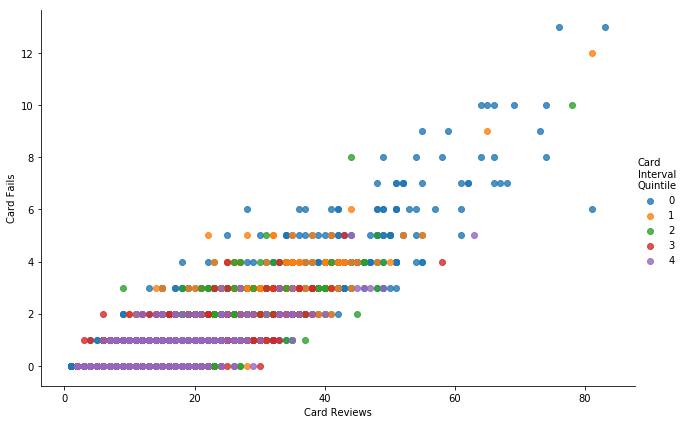

515 miliseconds


In [36]:
#make a scatterplot
#todo: give this graph a title
#todo: rename "lapses" & "reps" to be "Forgot Count" and "Review Count"
# graph 001
#todo: increase in size, make sure data points are not obscured
def stuff_1():
    ax = sns.lmplot(x='reps', y='lapses', height=6, aspect=1.5, data=df_cards, 
                    fit_reg=False, #remove regression line
                    hue='ivl_q',
                    legend_out = True
                   )
    ax.set(xlabel='Card Reviews', ylabel='Card Fails')
    new_title = 'Card\nInterval\nQuintile'
    ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_1)

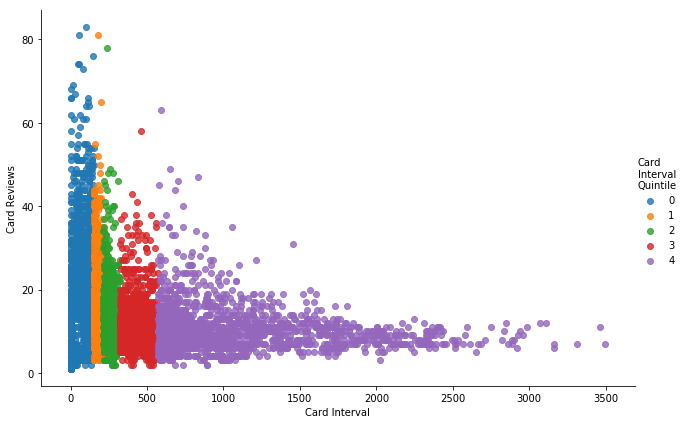

557 miliseconds


In [37]:
# graph 002
# by comparing repetition count to memory interval,
# we can assess the approx. "work" or "effort" done to remember a card
def stuff_2():
    ax = sns.lmplot(x='ivl', y='reps', height=6, aspect=1.5, data=df_cards, 
                    fit_reg=False, #remove regression line
                    hue='ivl_q',
                    legend_out = True
                   )
    ax.set(xlabel='Card Interval', ylabel='Card Reviews')
    new_title = 'Card\nInterval\nQuintile'
    ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_2)

# todo: rename ivl to "How Long The Word Will Last in Memory in Days"
# todo: color code words here by (1) learning vector, (2) in terms of timedelta since first studied, and/or (3) by certain tags such as 'animal','verb' or 'commonword'
# todo: (4) color code by word length

# Question 1:

How does the above chart compare with the variation in ease over interval? Can this be used to determine "typically memory resistant" (non-sticky) words?

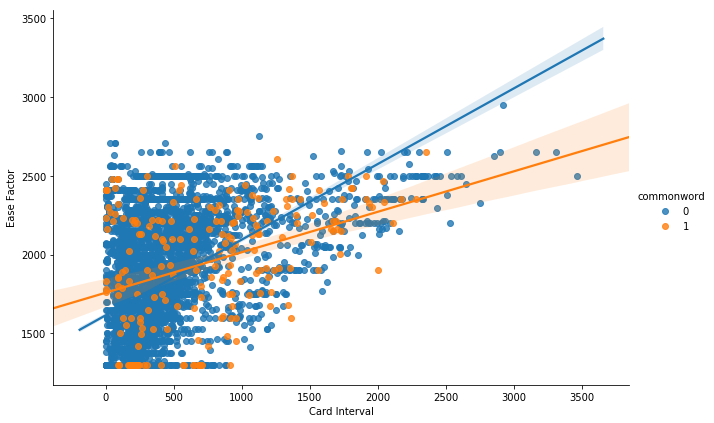

1058 miliseconds


In [38]:
# graph 003
def stuff_3():
    ax = sns.lmplot(x='mean_ivl', y='mean_factor', height=6, aspect=1.5, data=df_notes, 
                    hue='commonword'
                    #legend_out = True
                   )
    ax.set(xlabel='Card Interval', ylabel='Ease Factor')
    #new_title = 'Card\nInterval\nQuintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_3)

# Question 2:

What is unique (or what can we generalize) about the words that have very high repetition counts for lower (under 100) intervals?

In [39]:
# we want to understand the words conceptually: abstract vs concrete, verbs vs nouns vs adjectives
# todo: conduct data entry to add concrete boolean for each note

In [40]:
def stuff_4():
    ax = sns.lmplot(x='factor', y='ivl', height=6, aspect=1.5, data=df_cards, 
                    #fit_reg=False, #remove regression line
                    #hue='TermLenGroup',
                    legend_out = True
                   )
    ax.set(xlabel='Ease Factor', ylabel='Card Interval')
    #new_title = 'Term Length Group'
    #ax._legend.set_title(new_title)
    plt.show()

# We see work harder work demonstrated for longer words

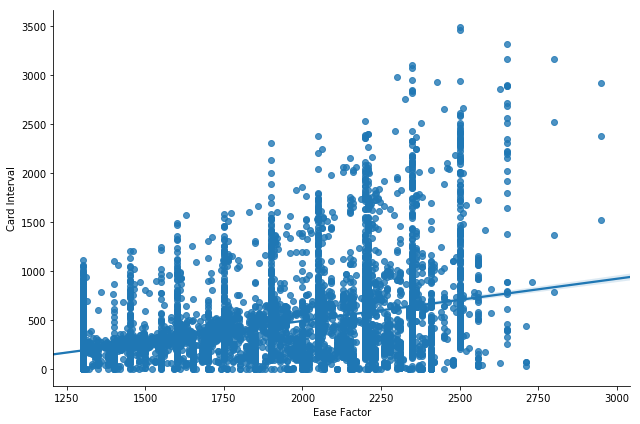

1475 miliseconds


In [41]:
time_it(stuff_4)
# todo: color code words here by (1) learning vector
# (2) in terms of timedelta since first studied,
# and/or (3) by certain tags such as 'animal','verb' or 'commonword'


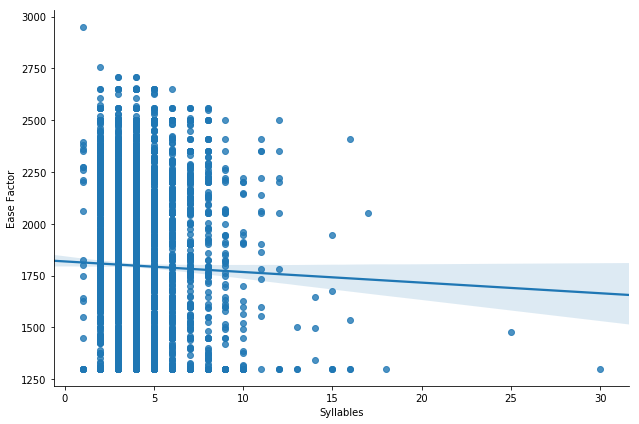

1020 miliseconds


In [42]:
#time_it(sns.lmplot, x='factor', y='Syllables', data=df_binary2)

def stuff_5():
    ax = sns.lmplot(x='Syllables', y='mean_factor', height=6, aspect=1.5, data=df_notes, 
                    #fit_reg=False, #remove regression line
                    #hue='ivl_q',
                    legend_out = True
                   )
    ax.set(xlabel='Syllables', ylabel='Ease Factor')
    #new_title = 'Interval Quintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_5)

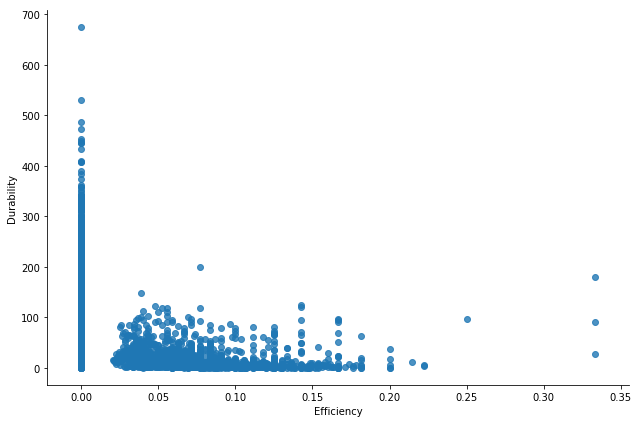

368 miliseconds


In [56]:
# graph 006
def stuff_6():
    ax = sns.lmplot(x='mean_efficiency', y='mean_durability',
                    height=6, aspect=1.5, data=df_notes,
                    fit_reg=False
                    #hue='mean_ivl'
                    #legend_out = True
                   )
    ax.set(xlabel='Efficiency', ylabel='Durability')
    #new_title = 'Card\nInterval\nQuintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_6)

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (efficiency ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (durability ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

545 miliseconds


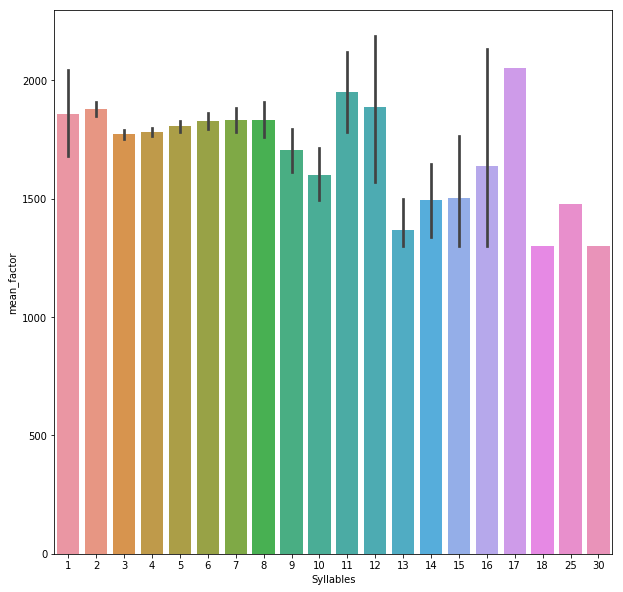

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
time_it(sns.barplot, x='Syllables', y='mean_factor', data=df_notes)

225 miliseconds


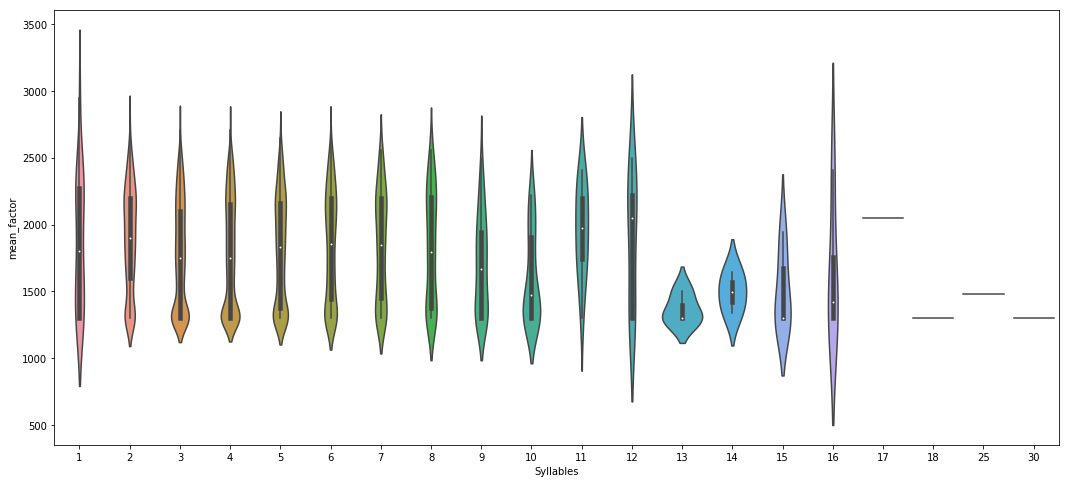

In [45]:
fig, ax = plt.subplots(figsize=(18,8))
time_it(sns.violinplot, x='Syllables', y='mean_factor', data=df_notes)
#time_it(sns.swarmplot, x='Syllables',
#              y='factor',
#              data=df_binary2, #make points black
#              color="k",
#              alpha=0.5) #slightly transparent"""

81 miliseconds


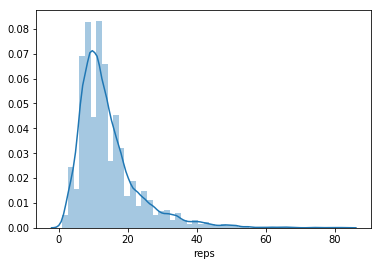

In [46]:
#create a histogram of the distribution of repetitions
time_it(sns.distplot, df_cards.reps)

44 miliseconds


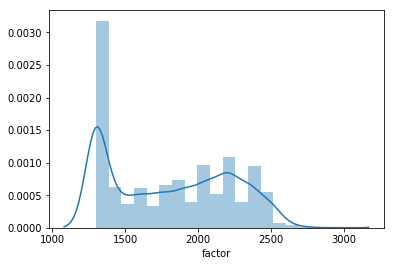

In [47]:
#create a histogram of the distribution of ease
time_it(sns.distplot, df_cards.factor)

75 miliseconds


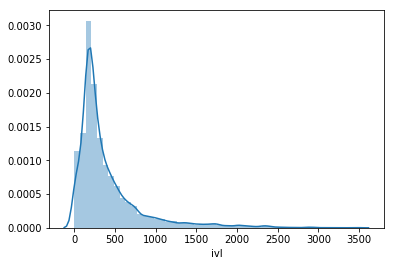

In [48]:
#create a histogram of the distribution of intervals
time_it(sns.distplot, df_cards.ivl)

In [49]:
df_notes.loc[df_notes['Syllables']>16]

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,...,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_efficiency,total_efficiency,mean_durability
234,1346057958628,inspect history fromnewspaper fromdict culture,東京電力福島・第１原発事故,とうきょうでんりょくふくしま・だいいちげんぱつじこ,2012-08-27 08:59:18.628,2019-05-05 16:13:58.000,0,0,0,0,...,0.0,18,0,0,0,1,0,0.000000,0.000000,16.555556
301,1346215143756,fromdict numeric datesandtime,1837～1901年,せんはっぴゃくさんじゅうななねんからせんきゅうひゃくいちねん,2012-08-29 04:39:03.756,2019-04-21 16:58:53.000,0,0,0,0,...,0.0,14,0,0,0,1,0,0.000000,0.000000,15.714286
414,1346216471844,fromdict counter numeric datesandtime,千九百八十九年,せんきゅうひゃくはちじゅうきゅうねん,2012-08-29 05:01:11.844,2017-12-20 02:00:49.000,0,0,0,0,...,1.0,23,1,0,0,1,0,0.043478,0.043478,10.913043
5748,1387411183585,numeric datesandtime,千九百八十七年,せんきゅうひゃくはちじゅうななねん,2013-12-18 23:59:43.585,2017-12-20 02:00:49.000,0,0,0,0,...,0.0,11,0,0,0,1,0,0.000000,0.000000,28.090909


555 miliseconds


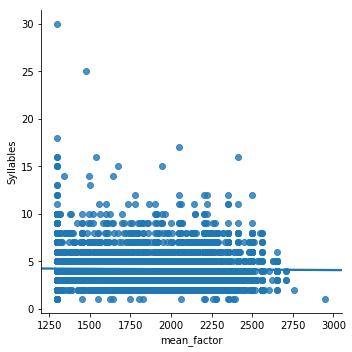

In [50]:
#make a scatterplot
time_it(sns.lmplot, x='mean_factor', y='Syllables', data=df_notes)

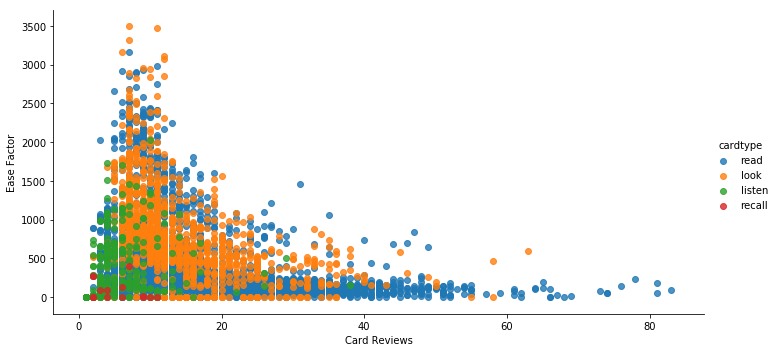

696 miliseconds


In [51]:
#todo: increase in size, make sure data points are not obscured
def stuff_a():
    ax = sns.lmplot(x='reps', y='ivl', height=5, aspect=2, data=df_cards, 
                    fit_reg=False, #remove regression line
                    hue='cardtype',
                    legend_out = True
                   )
    ax.set(xlabel='Card Reviews', ylabel='Ease Factor')
    #new_title = 'Card Vectors'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_a)

72 miliseconds


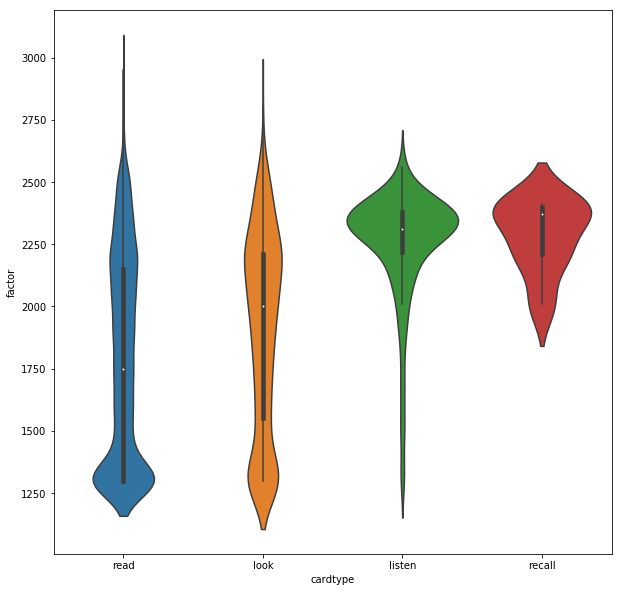

In [52]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
time_it(sns.violinplot, x="cardtype", y="factor", data=df_cards)